 <h3> Faço a correlação de pearson

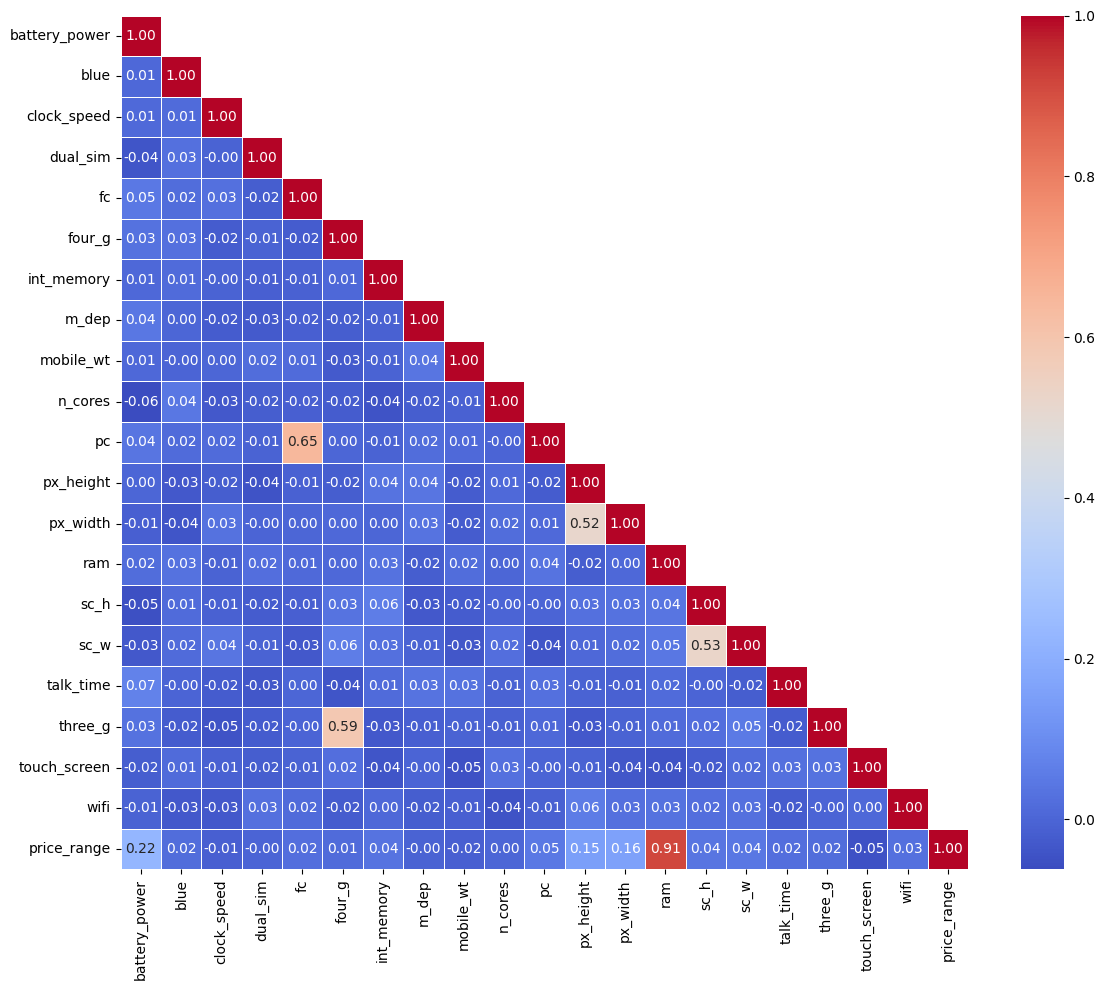

In [ ]:
from functions.split_dataset import split_dataset
from functions.correlation import show_pearson_correlation

X_train, X_test, y_train, y_test = split_dataset()

#show_pearson_correlation(X_train, y_train, savePng=True)

 <h3> Divido o dataset

In [4]:
features = ['battery_power', 'ram']
#X_train, X_test, y_train, y_test = split_dataset(selected_features = features) # Chamo novamente com os parâmetros que quero
X_train, X_test, y_train, y_test = split_dataset()

<h3> Fiz um scaling no dataset

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<h3> Defini o K-Fold

In [6]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
# Definição do K-Fold
kf = KFold(n_splits=5, shuffle=True, random_state=28)

<h3> Defino o mlp e seus parâmetros

In [7]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(
    hidden_layer_sizes=(4), # Ficou melhor usando todos os atributos
    activation='tanh', #ficou melhor com essa
    solver='adam',
    alpha=0.001,   
    learning_rate='adaptive',
    max_iter=2000, # abaixo de 1k dá warning de não convergência
    random_state=28,
    verbose=False
)


<h3> Executo o código e calculo métricas

In [8]:
import numpy as np

scores = []
for train_index, val_index in kf.split(X_train):
    X_tr, X_val = X_train[train_index], X_train[val_index]
    y_tr, y_val = y_train.iloc[train_index], y_train.iloc[val_index]

    mlp.fit(X_tr, y_tr)
    y_pred = mlp.predict(X_val)
    scores.append(accuracy_score(y_val, y_pred))

print("Acurácias em cada fold:", scores)
print("Acurácia média (validação):", np.mean(scores))

y_test_pred = mlp.fit(X_train, y_train).predict(X_test)
print(f"Acurácia no teste: {accuracy_score(y_test, y_test_pred)}")


Acurácias em cada fold: [0.95, 0.95, 0.9607142857142857, 0.9857142857142858, 0.9535714285714286]
Acurácia média (validação): 0.96
Acurácia no teste: 0.965


<h3> Faz a matriz de confusão

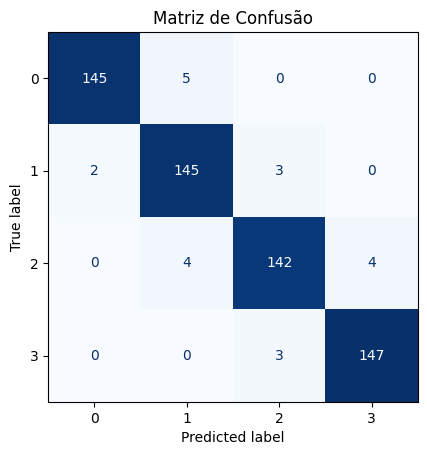

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_test_pred)

# Exibir matriz
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues, values_format='d', colorbar=False)  # mostra os números inteiros
plt.title("Matriz de Confusão")
plt.savefig("conf_matrix", dpi=300) 
plt.show()


<h3> Calculo as métricas do modelo treinado

In [50]:
from sklearn.metrics import classification_report
import pandas as pd

report = classification_report(y_test, y_test_pred, output_dict=True)

for key, value in report.items():
    if isinstance(value, dict): #precisa pq accuracy não é um sub-dicionario
        value.pop('support', None)

report.pop('weighted avg')
accuracy = report.get("accuracy")
report.pop("accuracy")

df_report = pd.DataFrame(report).transpose()
report_string = df_report.to_string()

with open("Model_metrics.txt", 'w') as f:
    f.write(report_string)
    f.write(f"\n Model accuracy: {str(accuracy)}")
